## Purpose

To compute the ML performance of the proposed method in near real-time.

In [5]:
import json
from sklearn.metrics import roc_auc_score, average_precision_score
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns
import os

## Load the Dataset

In [2]:
# file = "results_reverse_light_on_attack_3_masquerade_distribution_ROAD.json"
# file = "results_correlated_signal_attack_3_masquerade_distribution_ROAD.json"
file = "results_reverse_light_off_attack_2_masquerade_correlation_ROAD.json"

with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
    grid2performance = json.load(outfile)

In [3]:
grid2performance.keys()

dict_keys(['50-10', '50-20', '50-30', '50-40', '50-50', '100-10', '100-20', '100-30', '100-40', '100-50', '100-60', '100-70', '100-80', '100-90', '100-100', '150-10', '150-20', '150-30', '150-40', '150-50', '150-60', '150-70', '150-80', '150-90', '150-100', '150-110', '150-120', '150-130', '150-140', '150-150', '200-10', '200-20', '200-30', '200-40', '200-50', '200-60', '200-70', '200-80', '200-90', '200-100', '200-110', '200-120', '200-130', '200-140', '200-150', '200-160', '200-170', '200-180', '200-190', '200-200', '250-10', '250-20', '250-30', '250-40', '250-50', '250-60', '250-70', '250-80', '250-90', '250-100', '250-110', '250-120', '250-130', '250-140', '250-150', '250-160', '250-170', '250-180', '250-190', '250-200', '250-210', '250-220', '250-230', '250-240', '250-250', '300-10', '300-20', '300-30', '300-40', '300-50', '300-60', '300-70', '300-80', '300-90', '300-100', '300-110', '300-120', '300-130', '300-140', '300-150', '300-160', '300-170', '300-180', '300-190', '300-200',

In [4]:
key2aucroc = defaultdict(list)
index = []

for key in grid2performance.keys():

    ground_truth = grid2performance[key]["ground_truth"]
    predict_proba = grid2performance[key]["predict_proba"]

    print(key)
    # if len(set(ground_truth)) == 1:
    #     print(ground_truth)

    print(len(ground_truth), ground_truth)
    print(len(predict_proba), predict_proba)

    columns = key.split("-")

    # print(columns)
    key2aucroc[columns[0]].append(roc_auc_score(ground_truth, predict_proba))
    # sample.append(dict(entry))

    if columns[1] not in index: 
        index.append(columns[1])

    # break

key2aucroc = dict(key2aucroc)
# print(key2aucroc)
# print(len(index), index)

df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
df_rocauc.index = index

50-10
406 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [6]:
display(df_rocauc)
df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows
display(df_rocauc)

50       100       150       200       250       300       350  \
10   0.478623  0.421490  0.386425  0.373300  0.329282  0.312842  0.292036   
20   0.479861  0.413626  0.384825  0.371204  0.324164  0.313061  0.281907   
30   0.504688  0.440491  0.363880  0.376097  0.335389  0.300444  0.302299   
40   0.462945  0.417541  0.344134  0.348026  0.332837  0.334848  0.279243   
50   0.461382  0.414541  0.386154  0.383385  0.334200  0.313941  0.302381   
60        NaN  0.359665  0.378022  0.399926  0.319306  0.282414  0.284369   
70        NaN  0.374384  0.327877  0.375253  0.320320  0.244939  0.275385   
80        NaN  0.403871  0.292092  0.291016  0.317215  0.297101  0.307487   
90        NaN  0.406602  0.401786  0.336379  0.334975  0.301934  0.288333   
100       NaN  0.405488  0.377000  0.450256  0.322874  0.352391  0.239712   
110       NaN       NaN  0.439614  0.362319  0.350490  0.267157  0.285000   
120       NaN       NaN  0.294372  0.340548  0.334776  0.240469  0.321114   
130       NaN       NaN  0.410866  0.502547  0.328333  0.379310  0.405172   
140       NaN       NaN  0.304598  0.343254  0.239766  0.224172  0.268000   
150       NaN       NaN  0.305011  0.409502  0.322222  0.268889  0.384259   
160       NaN       NaN       NaN  0.340000  0.313725  0.258312  0.352941   
170       NaN       NaN       NaN  0.433333  0.420290  0.397727  0.383523   
180       NaN       NaN       NaN  0.392857  0.337662  0.240260  0.238095   
190       NaN       NaN       NaN  0.283217  0.335714  0.364286  0.332143   
200       NaN       NaN       NaN  0.380769  0.353846  0.404858  0.174603   
210       NaN       NaN       NaN       NaN  0.209402  0.175214  0.282051   
220       NaN       NaN       NaN       NaN  0.203704  0.222222  0.341346   
230       NaN       NaN       NaN       NaN  0.191176  0.161458  0.276042   
240       NaN       NaN       NaN       NaN  0.294118  0.198864  0.295455   
250       NaN       NaN       NaN       NaN  0.425000  0.456250  0.436364   
260       NaN       NaN       NaN       NaN       NaN  0.373333  0.406667   
270       NaN       NaN       NaN       NaN       NaN  0.214286  0.214286   
280       NaN       NaN       NaN       NaN       NaN  0.177778  0.215385   
290       NaN       NaN       NaN       NaN       NaN  0.269231  0.369231   
300       NaN       NaN       NaN       NaN       NaN  0.264957  0.205128   
310       NaN       NaN       NaN       NaN       NaN       NaN  0.231481   
320       NaN       NaN       NaN       NaN       NaN       NaN  0.403846   
330       NaN       NaN       NaN       NaN       NaN       NaN  0.131313   
340       NaN       NaN       NaN       NaN       NaN       NaN  0.364583   
350       NaN       NaN       NaN       NaN       NaN       NaN  0.204545   
360       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
370       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
380       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
390       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
400       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          400  
10   0.307056  
20   0.299054  
30   0.303578  
40   0.294970  
50   0.324332  
60   0.286423  
70   0.341538  
80   0.269103  
90   0.301709  
100  0.308995  
110  0.326250  
120  0.286357  
130  0.384480  
140  0.290000  
150  0.345538  
160  0.214646  
170  0.383929  
180  0.223333  
190  0.342857  
200  0.289683  
210  0.333333  
220  0.274038  
230  0.270833  
240  0.183333  
250  0.363636  
260  0.460000  
270  0.135714  
280  0.346154  
290  0.276923  
300  0.196581  
310  0.314815  
320  0.240741  
330  0.242424  
340  0.409091  
350  0.363636  
360  0.220779  
370  0.246753  
380  0.376623  
390  0.442857  
400  0.342857

50       100       150       200       250       300       350  \
400       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
390       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
380       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
370       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
360       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
350       NaN       NaN       NaN       NaN       NaN       NaN  0.204545   
340       NaN       NaN       NaN       NaN       NaN       NaN  0.364583   
330       NaN       NaN       NaN       NaN       NaN       NaN  0.131313   
320       NaN       NaN       NaN       NaN       NaN       NaN  0.403846   
310       NaN       NaN       NaN       NaN       NaN       NaN  0.231481   
300       NaN       NaN       NaN       NaN       NaN  0.264957  0.205128   
290       NaN       NaN       NaN       NaN       NaN  0.269231  0.369231   
280       NaN       NaN       NaN       NaN       NaN  0.177778  0.215385   
270       NaN       NaN       NaN       NaN       NaN  0.214286  0.214286   
260       NaN       NaN       NaN       NaN       NaN  0.373333  0.406667   
250       NaN       NaN       NaN       NaN  0.425000  0.456250  0.436364   
240       NaN       NaN       NaN       NaN  0.294118  0.198864  0.295455   
230       NaN       NaN       NaN       NaN  0.191176  0.161458  0.276042   
220       NaN       NaN       NaN       NaN  0.203704  0.222222  0.341346   
210       NaN       NaN       NaN       NaN  0.209402  0.175214  0.282051   
200       NaN       NaN       NaN  0.380769  0.353846  0.404858  0.174603   
190       NaN       NaN       NaN  0.283217  0.335714  0.364286  0.332143   
180       NaN       NaN       NaN  0.392857  0.337662  0.240260  0.238095   
170       NaN       NaN       NaN  0.433333  0.420290  0.397727  0.383523   
160       NaN       NaN       NaN  0.340000  0.313725  0.258312  0.352941   
150       NaN       NaN  0.305011  0.409502  0.322222  0.268889  0.384259   
140       NaN       NaN  0.304598  0.343254  0.239766  0.224172  0.268000   
130       NaN       NaN  0.410866  0.502547  0.328333  0.379310  0.405172   
120       NaN       NaN  0.294372  0.340548  0.334776  0.240469  0.321114   
110       NaN       NaN  0.439614  0.362319  0.350490  0.267157  0.285000   
100       NaN  0.405488  0.377000  0.450256  0.322874  0.352391  0.239712   
90        NaN  0.406602  0.401786  0.336379  0.334975  0.301934  0.288333   
80        NaN  0.403871  0.292092  0.291016  0.317215  0.297101  0.307487   
70        NaN  0.374384  0.327877  0.375253  0.320320  0.244939  0.275385   
60        NaN  0.359665  0.378022  0.399926  0.319306  0.282414  0.284369   
50   0.461382  0.414541  0.386154  0.383385  0.334200  0.313941  0.302381   
40   0.462945  0.417541  0.344134  0.348026  0.332837  0.334848  0.279243   
30   0.504688  0.440491  0.363880  0.376097  0.335389  0.300444  0.302299   
20   0.479861  0.413626  0.384825  0.371204  0.324164  0.313061  0.281907   
10   0.478623  0.421490  0.386425  0.373300  0.329282  0.312842  0.292036   

          400  
400  0.342857  
390  0.442857  
380  0.376623  
370  0.246753  
360  0.220779  
350  0.363636  
340  0.409091  
330  0.242424  
320  0.240741  
310  0.314815  
300  0.196581  
290  0.276923  
280  0.346154  
270  0.135714  
260  0.460000  
250  0.363636  
240  0.183333  
230  0.270833  
220  0.274038  
210  0.333333  
200  0.289683  
190  0.342857  
180  0.223333  
170  0.383929  
160  0.214646  
150  0.345538  
140  0.290000  
130  0.384480  
120  0.286357  
110  0.326250  
100  0.308995  
90   0.301709  
80   0.269103  
70   0.341538  
60   0.286423  
50   0.324332  
40   0.294970  
30   0.303578  
20   0.299054  
10   0.307056

## Visualization

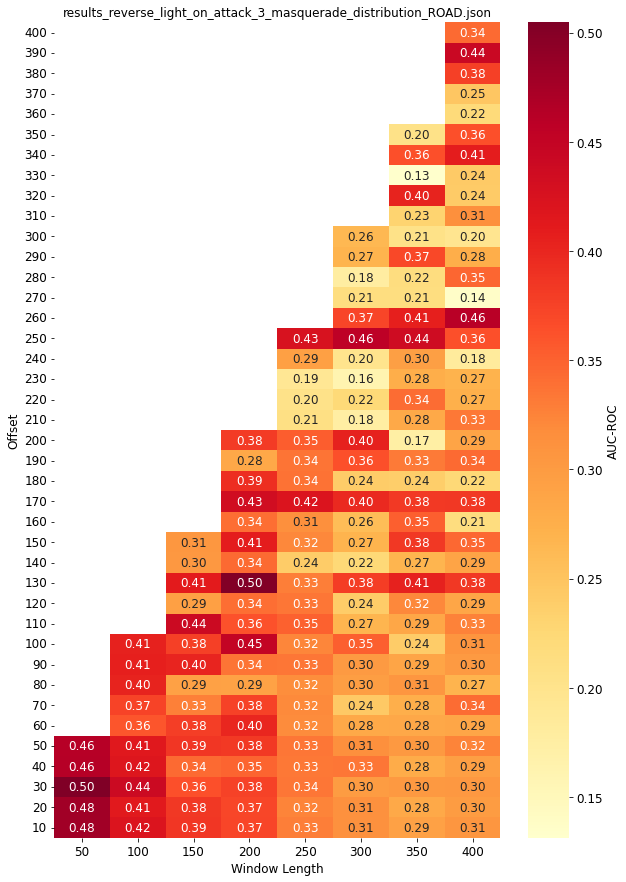

In [7]:
fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_rocauc, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
        annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title(file, fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
        g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## All Attack Files by Distribution Method

In [8]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_distribution_ROAD.json"):
            files.append(file)

print(files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

['results_reverse_light_on_attack_3_masquerade_distribution_ROAD.json', 'results_correlated_signal_attack_3_masquerade_distribution_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_distribution_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_distribution_ROAD.json', 'results_max_speedometer_attack_2_masquerade_distribution_ROAD.json', 'results_max_speedometer_attack_1_masquerade_distribution_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_distribution_ROAD.json', 'results_correlated_signal_attack_2_masquerade_distribution_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_distribution_ROAD.json', 'results_correlated_signal_attack_1_masquerade_distribution_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_distribution_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_distribution_ROAD.json', 'results_max_speedometer_attack_3_masquerade_distribution_ROAD.json']


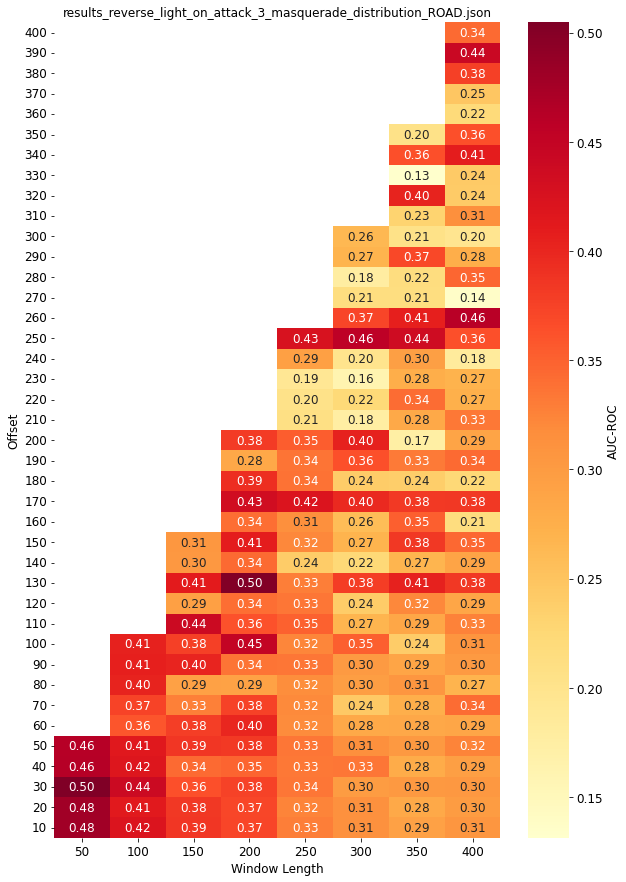

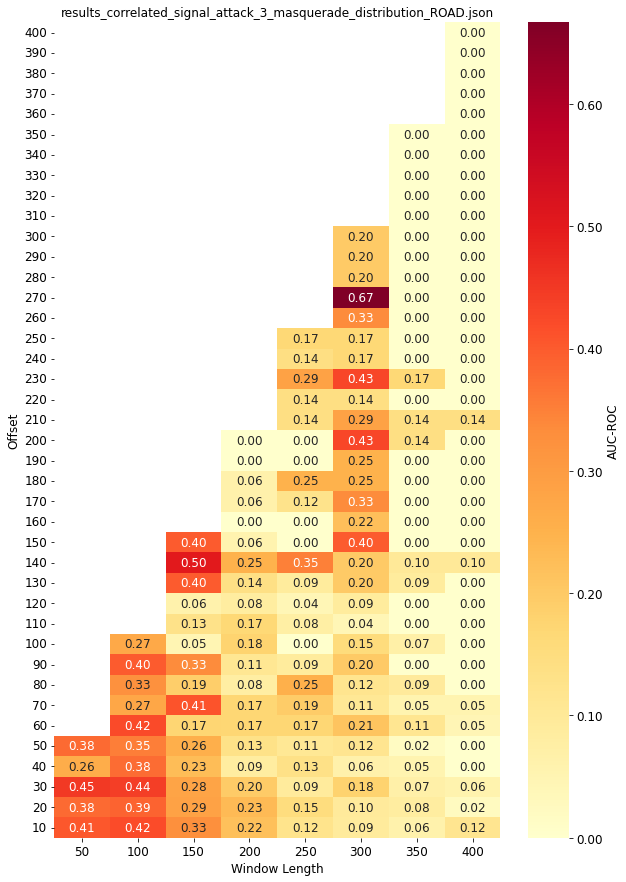

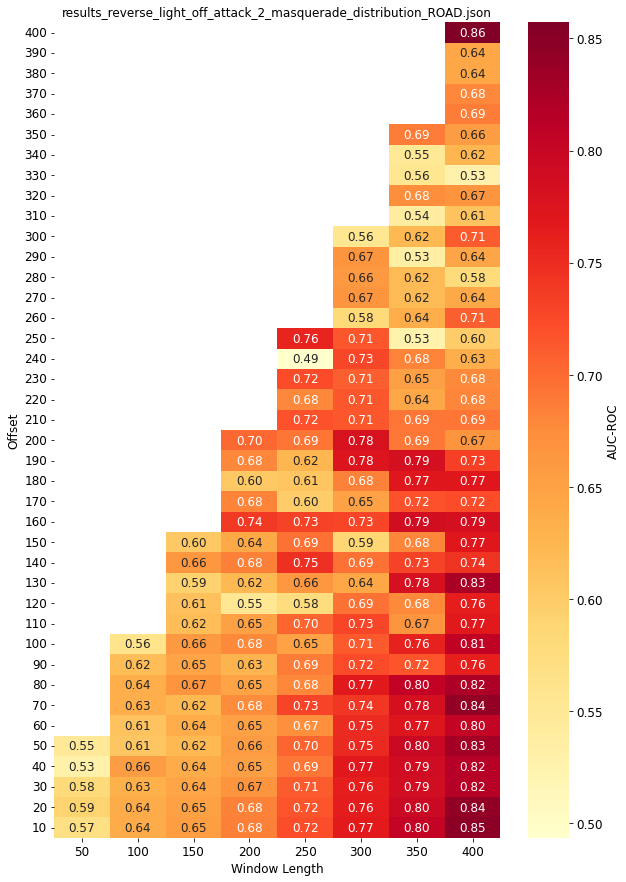

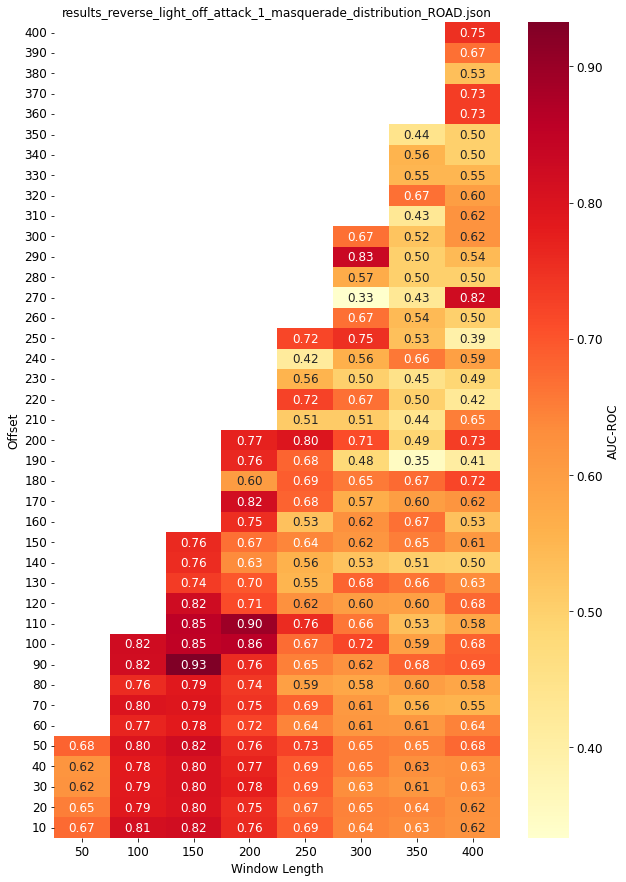

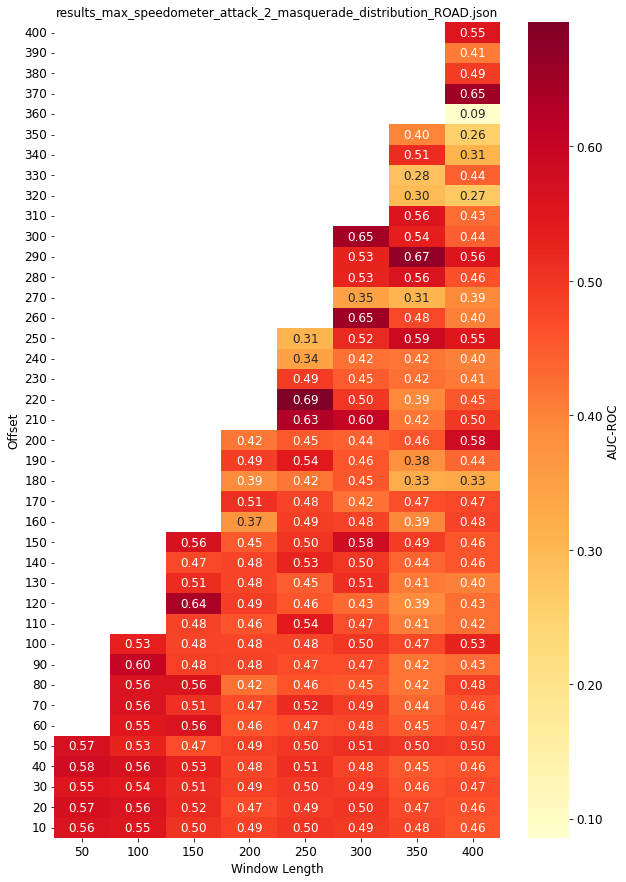

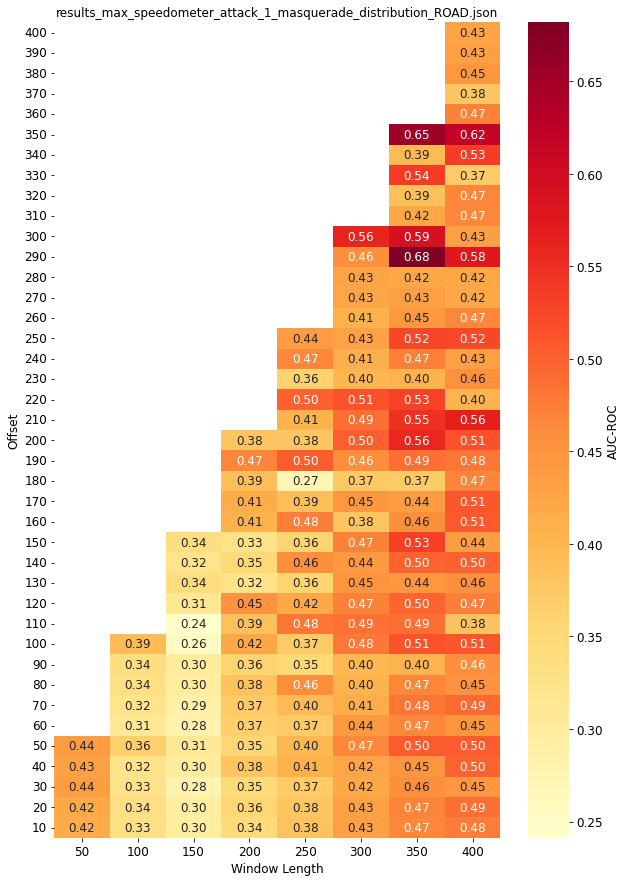

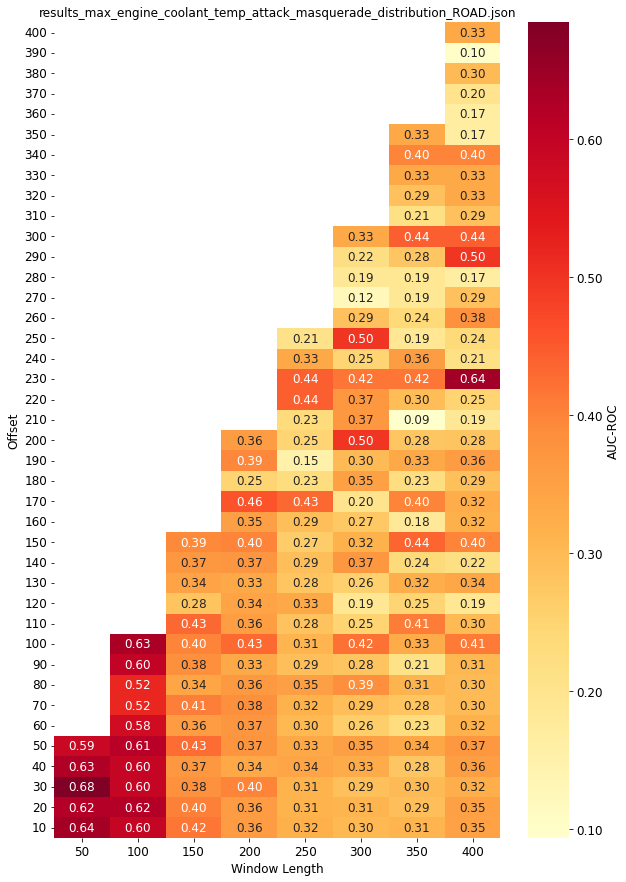

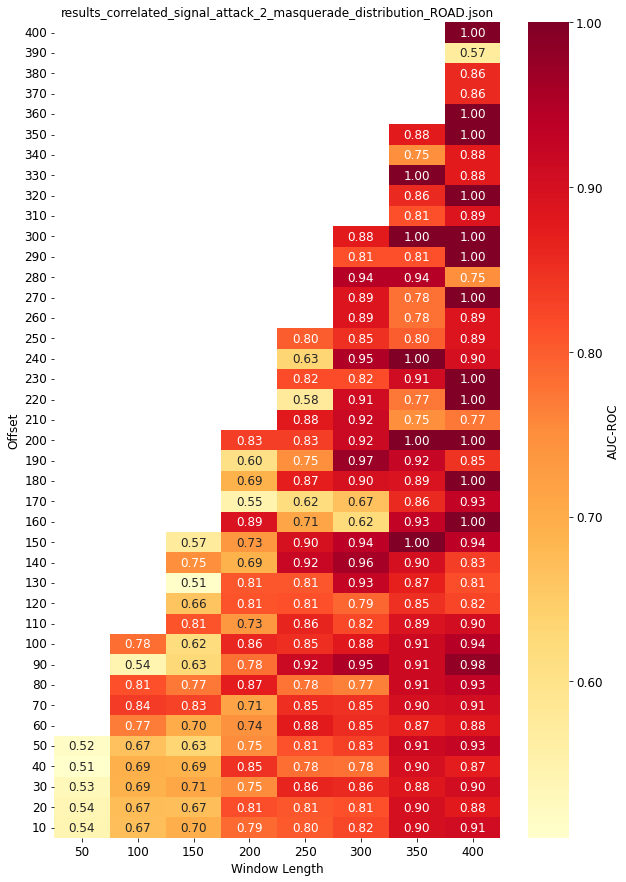

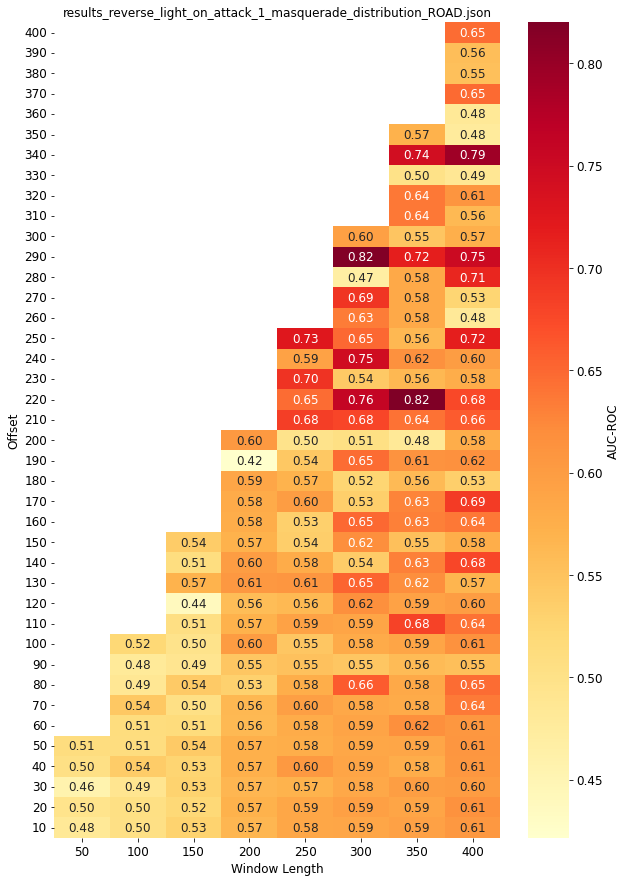

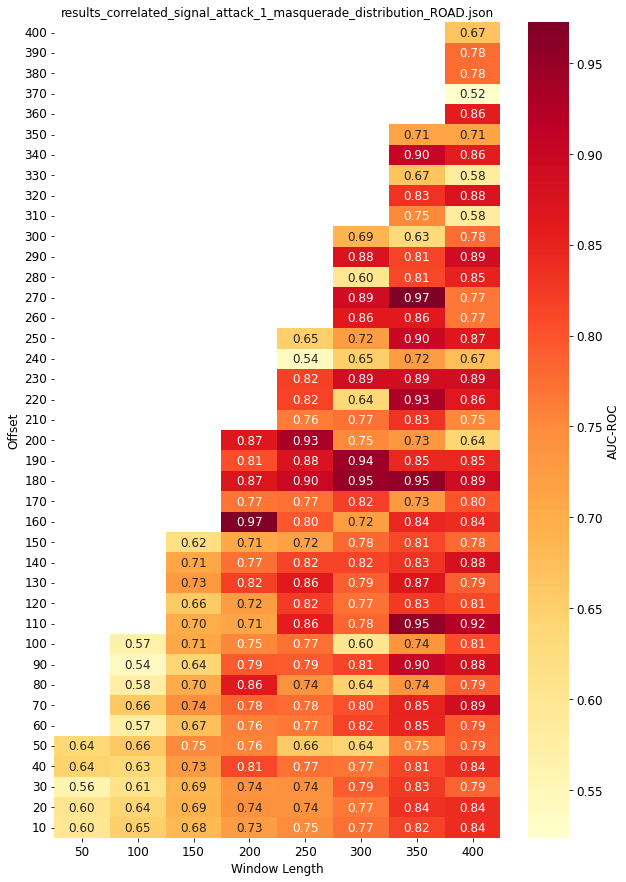

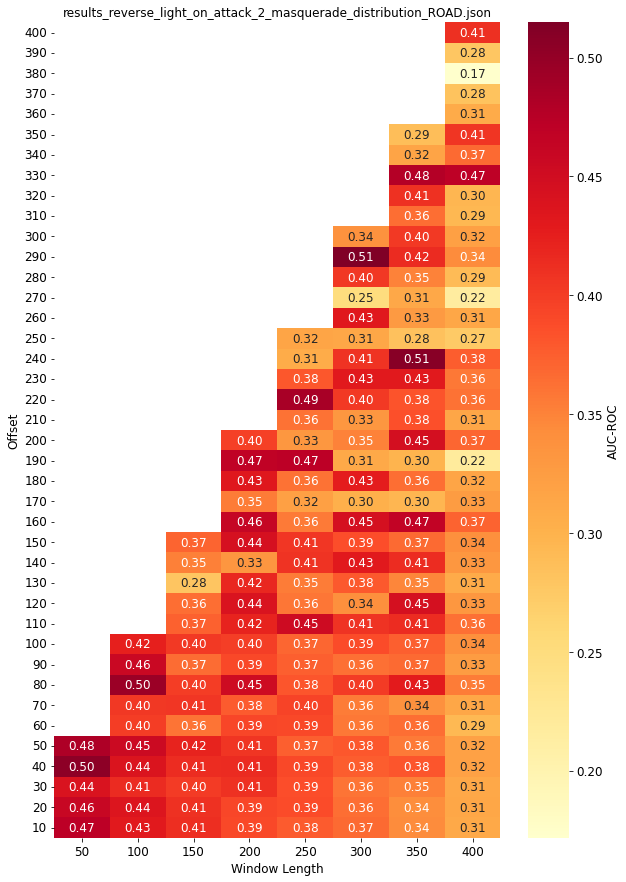

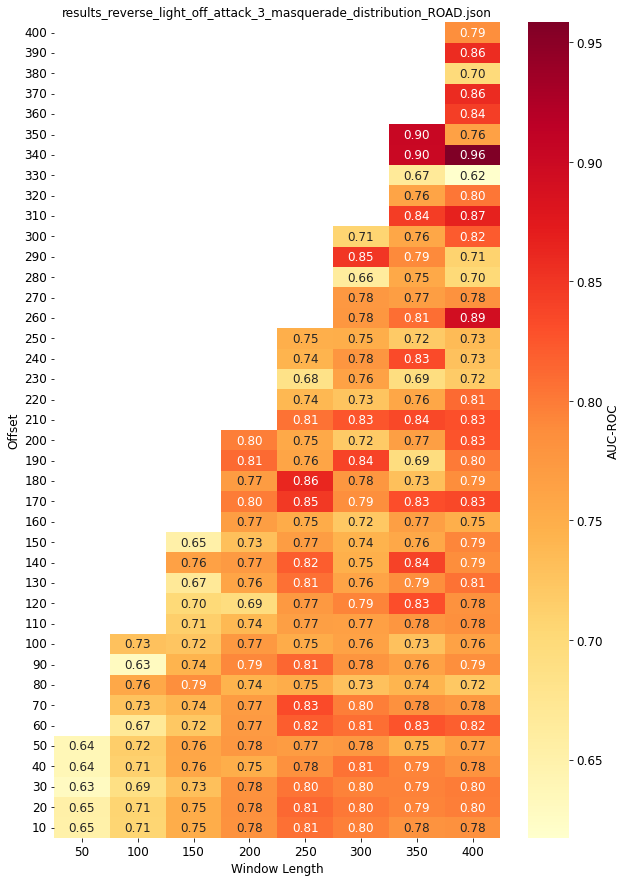

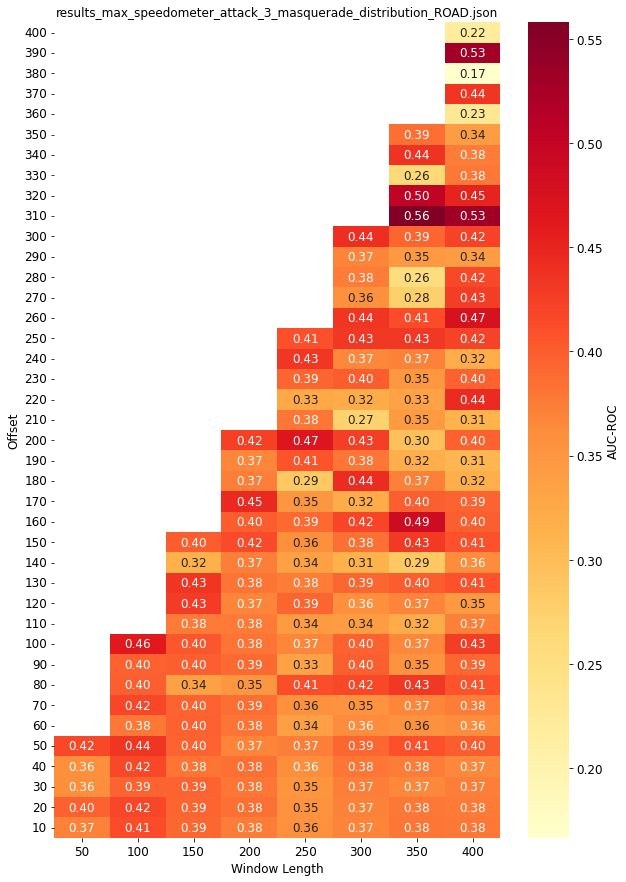

In [9]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

for index, file in enumerate(files):

    # print(file)

    with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2aucroc = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ground_truth = grid2performance[key]["ground_truth"]
        predict_proba = grid2performance[key]["predict_proba"]

        columns = key.split("-")

        # print(columns)
        key2aucroc[columns[0]].append(roc_auc_score(ground_truth, predict_proba))
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

    key2aucroc = dict(key2aucroc)
    # print(key2aucroc)
    # print(len(index), index)

    df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
    df_rocauc.index = index

    df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows

    fig, ax = plt.subplots(figsize=(10, 15))

    g = sns.heatmap(df_rocauc, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
            annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

    ax.set_ylabel("Offset", fontsize=12)
    ax.set_xlabel("Window Length", fontsize=12)
    ax.set_title(file, fontsize=12)

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # x-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

    # y-axis
    if g.get_yticklabels():
            g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)



## All Attack Files by Correlation Method

In [6]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_correlation_ROAD.json"):
            files.append(file)

print(files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

['results_reverse_light_on_attack_1_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_1_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_1_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_3_masquerade_correlation_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_3_masquerade_correlation_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_correlation_ROAD.json', 'results_reverse_light_on_attack_3_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_2_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_2_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_correlation_ROAD.json']


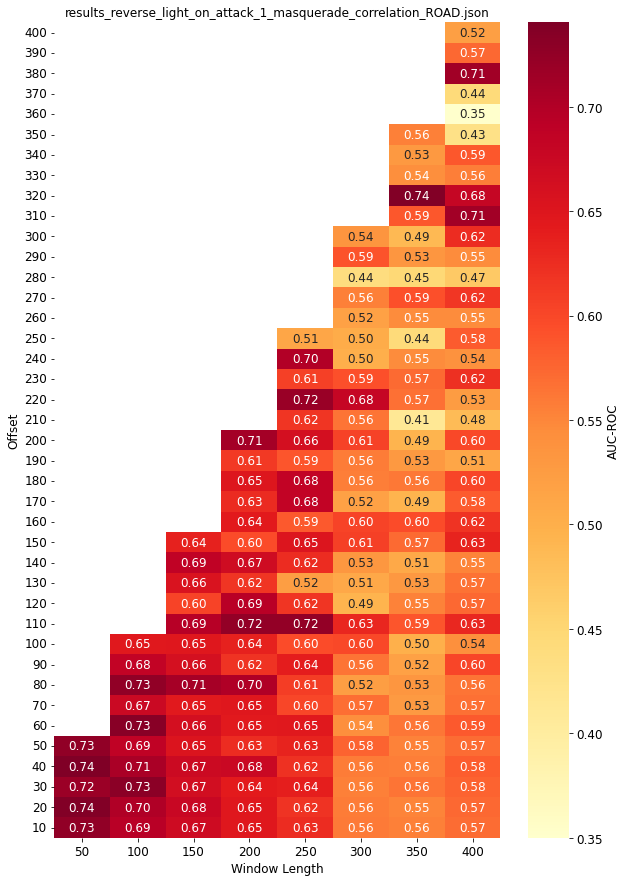

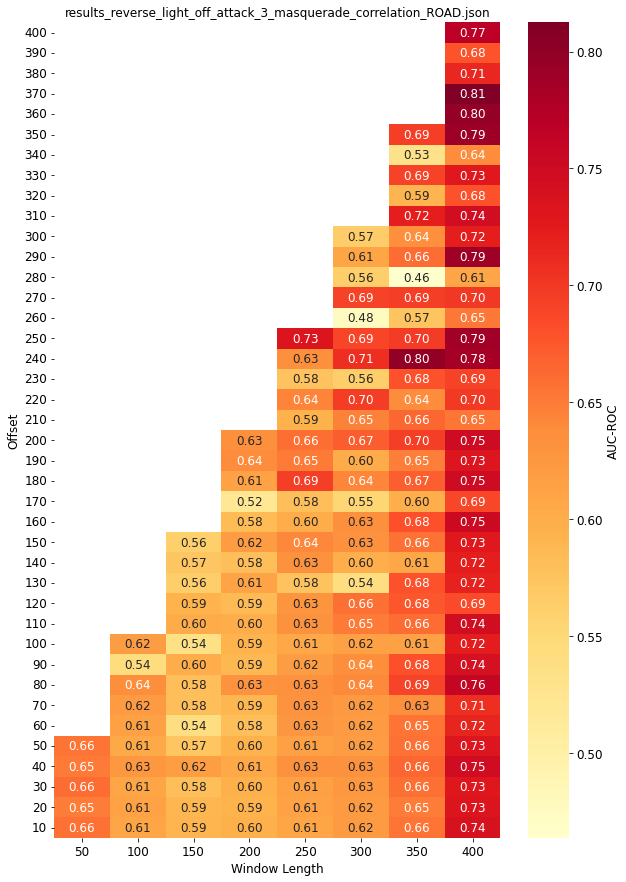

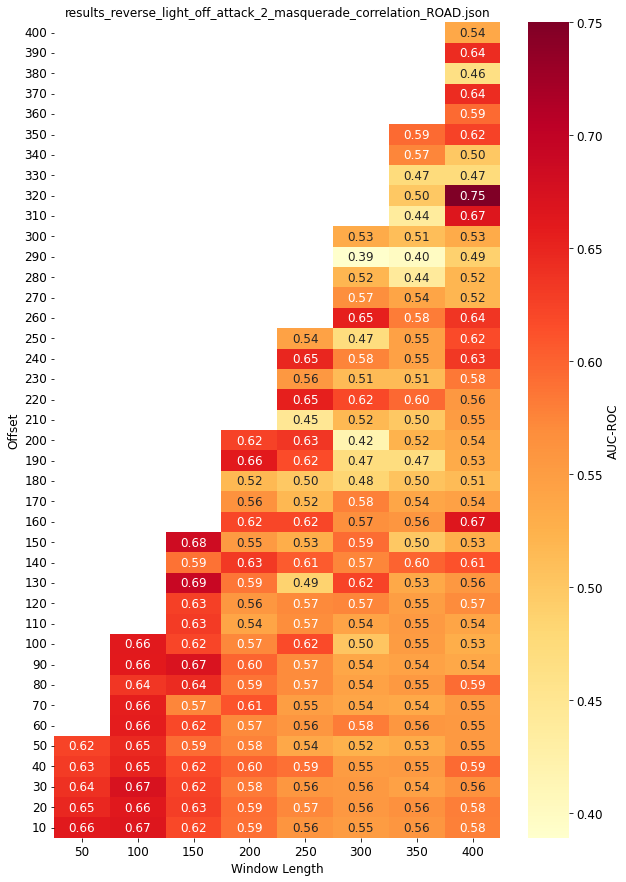

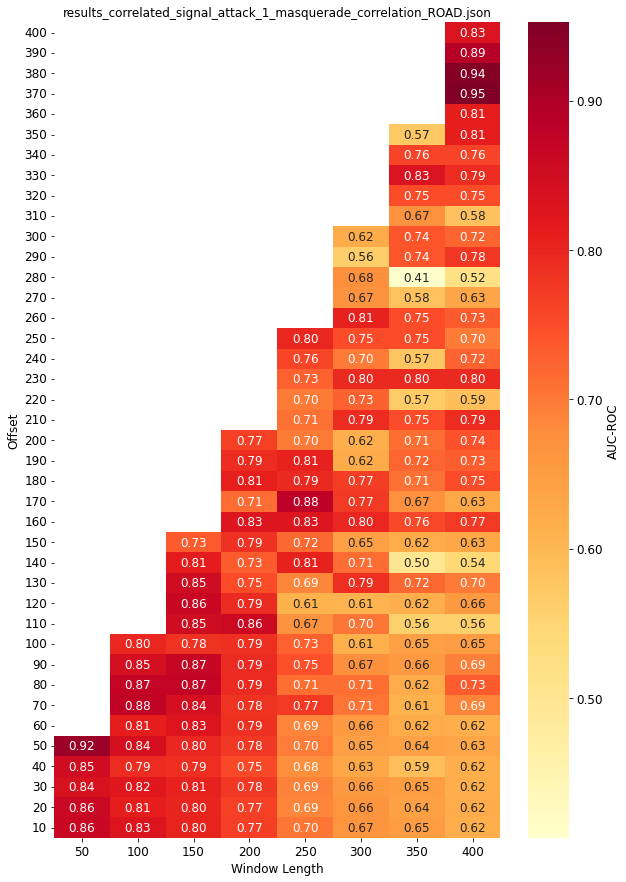

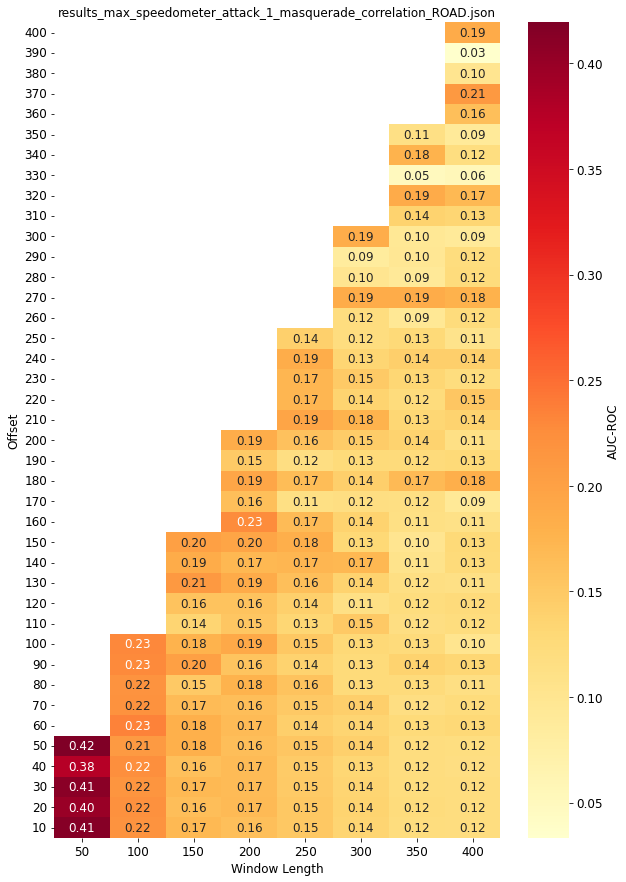

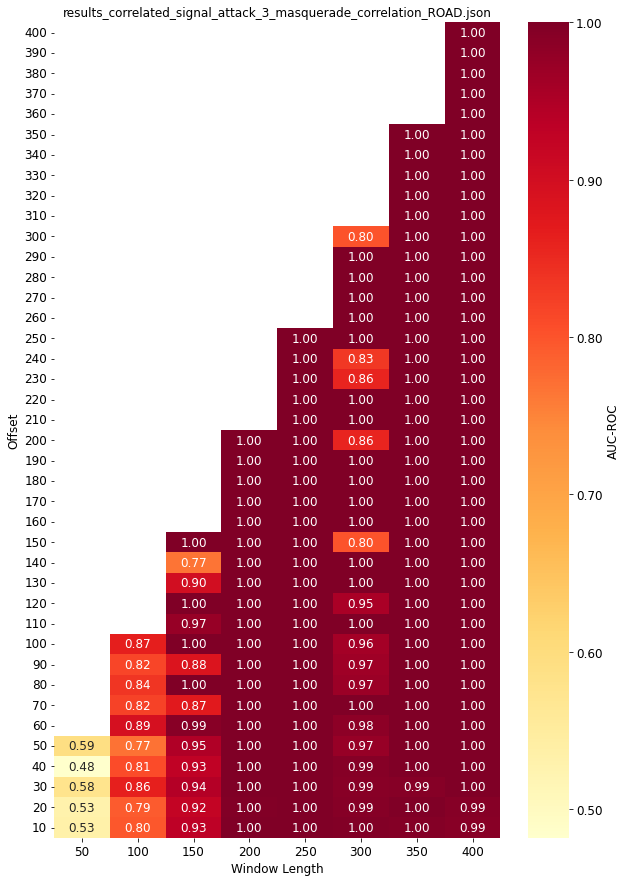

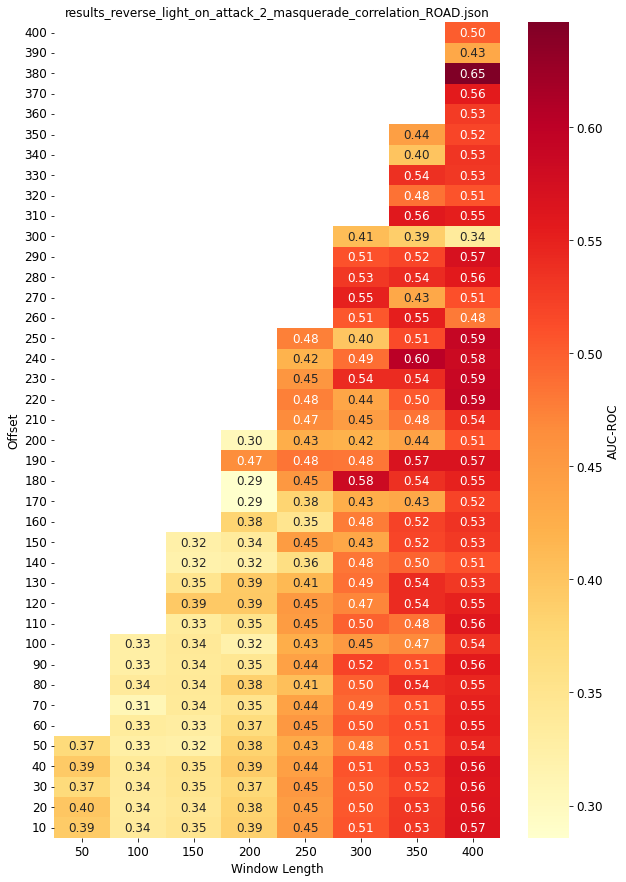

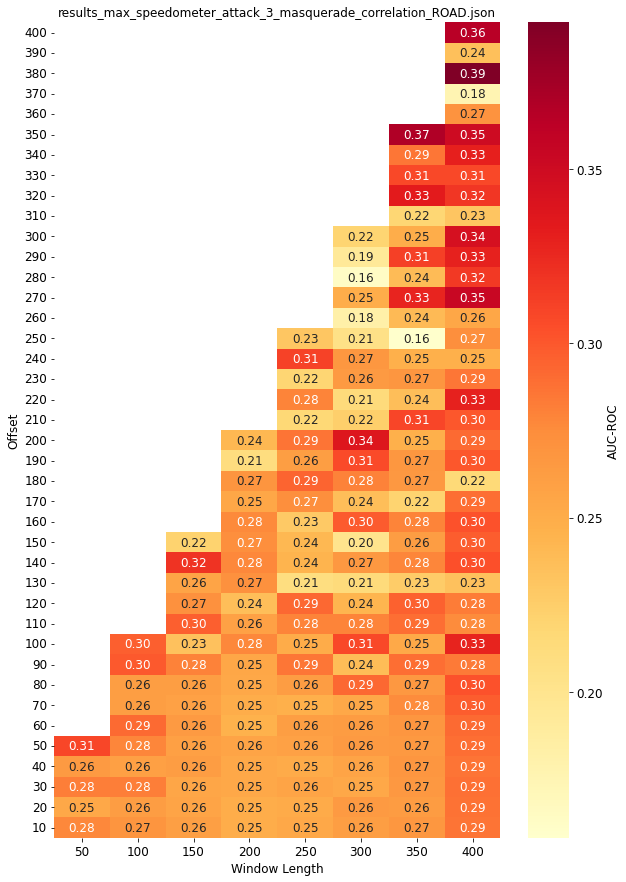

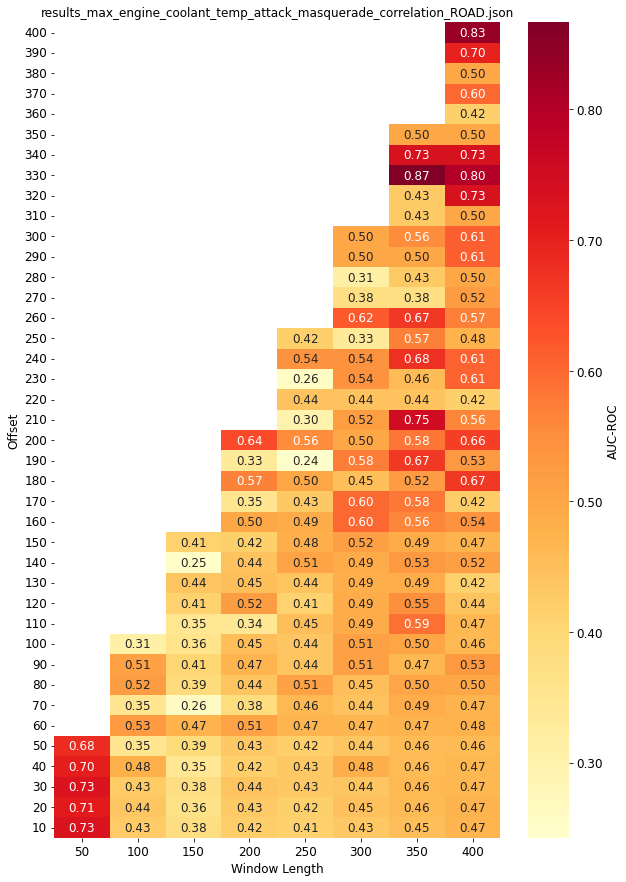

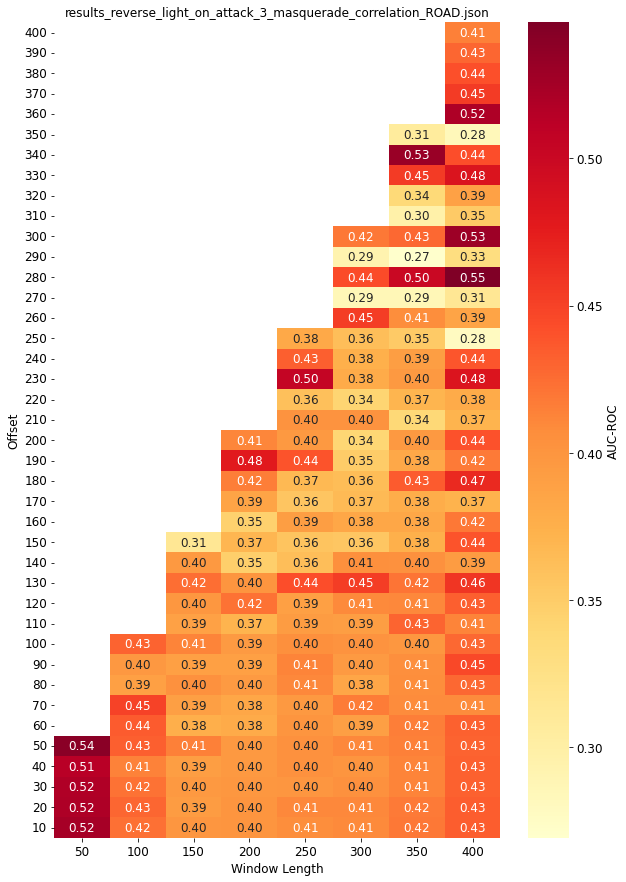

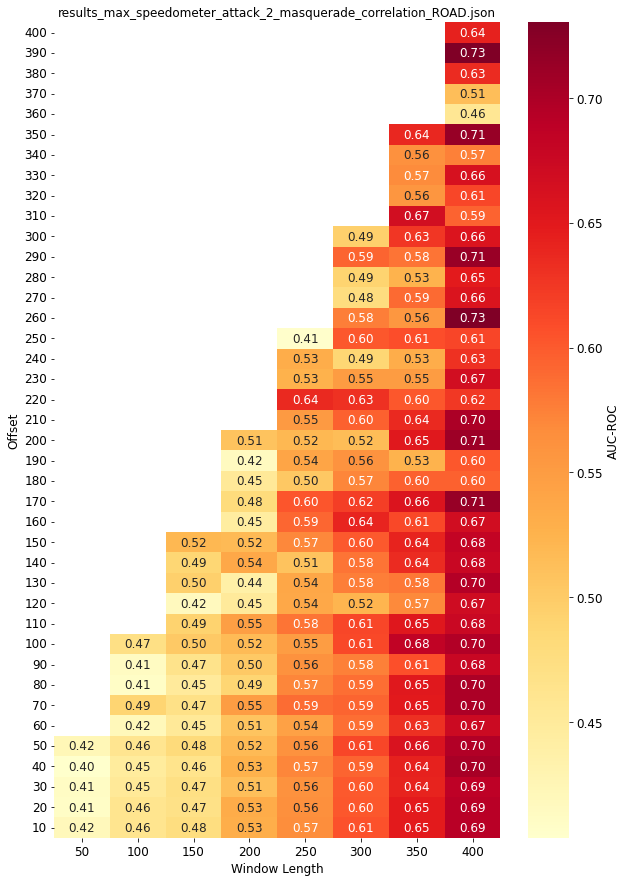

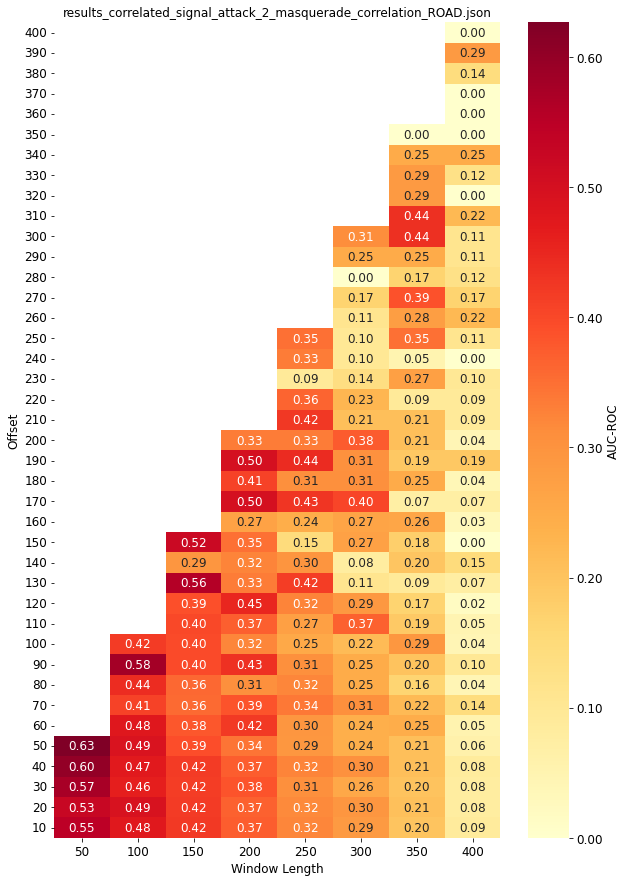

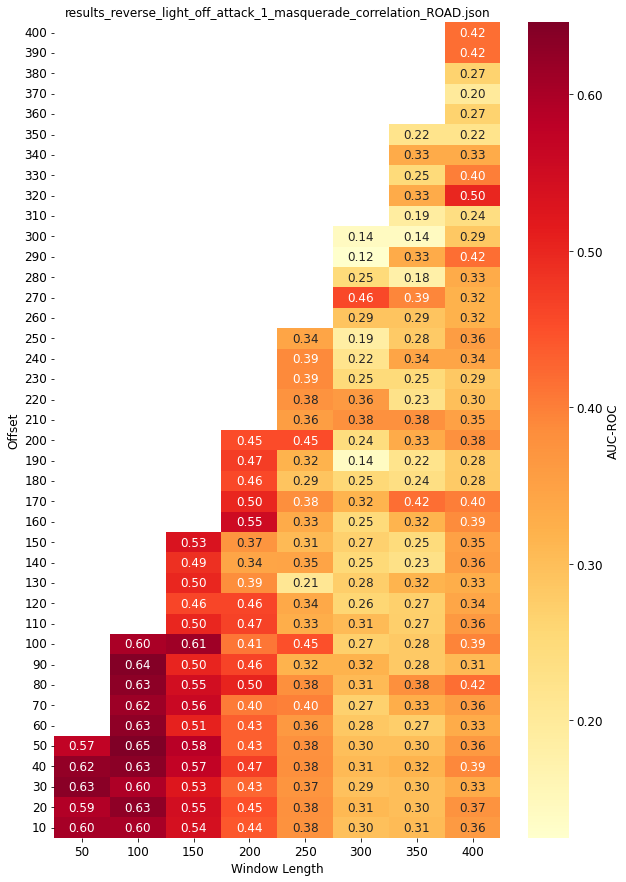

In [8]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

for index, file in enumerate(files):

    # print(file)

    with open(f"/home/cloud/Projects/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2aucroc = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ground_truth = grid2performance[key]["ground_truth"]
        predict_proba = grid2performance[key]["predict_proba"]

        columns = key.split("-")

        # print(columns)
        key2aucroc[columns[0]].append(roc_auc_score(ground_truth, predict_proba))
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

    key2aucroc = dict(key2aucroc)
    # print(key2aucroc)
    # print(len(index), index)

    df_rocauc = pd.DataFrame({k:pd.Series(v) for k, v in key2aucroc.items()})
    df_rocauc.index = index

    df_rocauc = df_rocauc[::-1] # invert the order of dataframe rows

    fig, ax = plt.subplots(figsize=(10, 15))

    g = sns.heatmap(df_rocauc, annot=True, cbar=True, cbar_kws={"label": "AUC-ROC", "location":"right", "pad":0.05, "format":"%.2f"}, 
            annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

    ax.set_ylabel("Offset", fontsize=12)
    ax.set_xlabel("Window Length", fontsize=12)
    ax.set_title(file, fontsize=12)

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # x-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

    # y-axis
    if g.get_yticklabels():
            g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)